In [1]:
# ================================================================================ #
# =========================== Goolge Colab File Upload =========================== #
# ================================================================================ #

from google.colab import drive
drive.mount('/content/drive')

from google.colab import output
# !cp 파일1 파일2 # 파일1을 파일2로 복사 붙여넣기
!cp "/content/drive/MyDrive/Colab Notebooks/2021 빅데이터 통신 플랫폼 경진대회/datasets/datasets.zip" "datasets.zip"
# data.zip을 현재 디렉터리에 압축해제
!unzip "datasets.zip"
!unzip "covid_19_dataset.zip"
!unzip "KT_빅데이터플랫폼_데이터셋.zip"

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

output.clear()

In [2]:
!dir

Case.csv			PatientInfo.csv    StartupOrClosing_Region.csv
covid_19_dataset.zip		Policy.csv	   StartupOrClosing_Shop.csv
datasets.zip			popl.csv	   TimeAge.csv
dlvr_call.csv			Region.csv	   Time.csv
drive				sample_data	   TimeGender.csv
전체\ 데이터\ 설명.hwp		SearchTrend.csv    TimeProvince.csv
KT_빅데이터플랫폼_데이터셋.zip	SeoulFloating.csv  Weather.csv


In [3]:
# import library
import os
import glob
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from tqdm import tqdm, tqdm_notebook

# csv file download
csv_dir_lst = glob.glob('./*.csv');
df_dict = {}

for dir in tqdm_notebook(csv_dir_lst):
    filename = dir.split("./")[1].split(".")[0]

    try:
        df = pd.read_csv(dir)
    except:
        print("{} : encoding error!", filename)
        df = pd.read_csv(dir, encoding = 'cp949')

    df_dict[filename] = df.copy(...)

    del df

print(df_dict.keys())

df_Policy = df_dict["Policy"]
df_TimeAge = df_dict["TimeAge"]
df_TimeGender = df_dict["TimeGender"]
df_dlvr_call = df_dict["dlvr_call"]
df_Time = df_dict["Time"]
df_Weather = df_dict["Weather"]
df_StartupOrClosing_Region = df_dict["StartupOrClosing_Region"]
df_TimeProvince = df_dict["TimeProvince"]
df_PatientInfo = df_dict["PatientInfo"]
df_Case = df_dict["Case"]
df_popl = df_dict["popl"]
df_Region = df_dict["Region"]
df_StartupOrClosing_Shop = df_dict['StartupOrClosing_Shop']
df_SeoulFloating = df_dict['SeoulFloating'], 
df_SearchTrend = df_dict['SearchTrend']


from google.colab import output
output.clear()

In [4]:
# dlvr_call data analysis
df_dlvr_call.head()

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412854379205,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412853193037,D0005898,2900,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N


In [6]:
# sort by PROCESS_DT : time 
df_dlvr_call = df_dlvr_call.sort_values(by = ['PROCESS_DT'])
display(df_dlvr_call)

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N
5,3486940,2019-12-01,C000237,1,C000237,S0021813,아시안/양식,4121010100,경기도,광명시,광명동,\N,4121055000,412103187064,4121010200,경기도,광명시,철산동,\N,4121060000,412103187028,D0003991,3300,200,19000,2,NaN,2019-12-01 19:08:19,2019-12-01 19:37:13,2019-12-01 19:58:04,2019-12-01 19:58:06,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536068,10091692,2020-05-31,C000209,1,C000209,S0022157,야식,1154510200,서울특별시,금천구,독산동,\N,1154562000,115453000027,1154510300,서울특별시,금천구,시흥동,\N,1154567000,115454151316,D0008836,4180,400,17000,1,승인:KB국민카드,2020-05-31 20:06:08,2020-05-31 20:06:37,2020-05-31 20:21:22,2020-05-31 20:30:34,\N
3536069,10091693,2020-05-31,C000098,1,C000099,S0040458,한식,4128710300,경기도,고양시 일산서구,탄현동,\N,4128754000,412873194033,4128710500,경기도,고양시 일산서구,덕이동,\N,4128759000,412873194012,D0011642,4000,0,21000,2,NaN,2020-05-31 20:10:32,2020-05-31 20:11:55,2020-05-31 20:29:33,2020-05-31 20:35:38,\N
3536070,10091694,2020-05-31,C000101,1,C000101,S0041832,배달전문업체,1156010100,서울특별시,영등포구,영등포동,\N,1156051500,115604154323,1156013200,서울특별시,영등포구,신길동,\N,1156051500,115604154735,D0010091,3300,300,21900,2,NaN,2020-05-31 20:20:33,2020-05-31 20:21:38,2020-05-31 20:29:45,2020-05-31 20:42:15,\N
3536012,10091606,2020-05-31,C000307,1,C000307,S0039190,한식,4159014000,경기도,화성시,새솔동,\N,4159051500,\N,4159014000,경기도,화성시,새솔동,\N,4159051500,415903351749,D0011242,3000,300,17000,1,승인:현대카드사,2020-05-31 19:44:28,2020-05-31 20:01:22,2020-05-31 20:05:05,2020-05-31 20:12:02,\N


In [7]:
# 정책(격리두기 포함 정부 정책)
display(df_Policy)

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
...,...,...,...,...,...,...,...
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaN
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaN
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaN


In [13]:
groupby_gov_policy = df_Policy.groupby(by = ['gov_policy'])

for key, item in groupby_gov_policy:
    print("=" * 100)
    print("groupby : {}".format(key))
    display(groupby_gov_policy.get_group(key))
    print("\n")

groupby : Close bars and clubs


,policy_id,country,type,gov_policy,detail,start_date,end_date
53,54,Korea,Administrative,Close bars and clubs,administrative order to close bars and clubs,2020-05-08,2020-06-07




groupby : Close karaoke


,policy_id,country,type,gov_policy,detail,start_date,end_date
55,56,Korea,Administrative,Close karaoke,Ban on gathering for 2 weeks for all karaoke a...,2020-05-21,2020-06-03




groupby : Drive-Through Screening Center


,policy_id,country,type,gov_policy,detail,start_date,end_date
24,25,Korea,Health,Drive-Through Screening Center,by Local Government,2020-02-26,NaN
25,26,Korea,Health,Drive-Through Screening Center,Standard Operating Procedures,2020-03-04,NaN




groupby : Electronic Wristbands


,policy_id,country,type,gov_policy,detail,start_date,end_date
52,53,Korea,Technology,Electronic Wristbands,on people who violate self-quarantine measures,2020-04-27,NaN




groupby : Emergency Use Authorization of Diagnostic Kit


,policy_id,country,type,gov_policy,detail,start_date,end_date
19,20,Korea,Health,Emergency Use Authorization of Diagnostic Kit,1st EUA,2020-02-04,NaN
20,21,Korea,Health,Emergency Use Authorization of Diagnostic Kit,2nd EUA,2020-02-12,NaN
21,22,Korea,Health,Emergency Use Authorization of Diagnostic Kit,3rd EUA,2020-02-27,NaN
22,23,Korea,Health,Emergency Use Authorization of Diagnostic Kit,4th EUA,2020-02-27,NaN
23,24,Korea,Health,Emergency Use Authorization of Diagnostic Kit,5th EUA,2020-03-13,NaN




groupby : Extends Tightened Quarantine Measures 


,policy_id,country,type,gov_policy,detail,start_date,end_date
60,61,Korea,Health,Extends Tightened Quarantine Measures,Gov't Extends Tightened Quarantine Measures in...,2020-05-28,2020-06-14




groupby : Infectious Disease Alert Level


,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN




groupby : KI-Pass: Korea Internet - Pass


,policy_id,country,type,gov_policy,detail,start_date,end_date
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaN




groupby : Logistics center


,policy_id,country,type,gov_policy,detail,start_date,end_date
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11




groupby : Mandatory 14-day Self-Quarantine


,policy_id,country,type,gov_policy,detail,start_date,end_date
17,18,Korea,Immigration,Mandatory 14-day Self-Quarantine,from all the countries,2020-04-01,NaN




groupby : Mandatory Self-Quarantine & Diagonostic Tests


,policy_id,country,type,gov_policy,detail,start_date,end_date
18,19,Korea,Immigration,Mandatory Self-Quarantine & Diagonostic Tests,from U.S.,2020-04-13,NaN




groupby : Mask Distribution


,policy_id,country,type,gov_policy,detail,start_date,end_date
26,27,Korea,Health,Mask Distribution,Public-Sale,2020-02-27,NaN
27,28,Korea,Health,Mask Distribution,5-day Rotation System,2020-03-09,NaN




groupby : Open API


,policy_id,country,type,gov_policy,detail,start_date,end_date
49,50,Korea,Technology,Open API,Public Mask Sales Information,2020-03-08,NaN




groupby : Open Data 


,policy_id,country,type,gov_policy,detail,start_date,end_date
48,49,Korea,Technology,Open Data,Patients Information,2020-01-20,NaN




groupby : School Closure


,policy_id,country,type,gov_policy,detail,start_date,end_date
33,34,Korea,Education,School Closure,Daycare Center for Children,2020-03-02,NaN




groupby : School Opening Delay


,policy_id,country,type,gov_policy,detail,start_date,end_date
34,35,Korea,Education,School Opening Delay,Kindergarten,2020-03-02,2020-04-06
35,36,Korea,Education,School Opening Delay,High School,2020-03-02,2020-04-06
36,37,Korea,Education,School Opening Delay,Middle School,2020-03-02,2020-04-06
37,38,Korea,Education,School Opening Delay,Elementary School,2020-03-02,2020-04-06




groupby : School Opening with Online Class


,policy_id,country,type,gov_policy,detail,start_date,end_date
38,39,Korea,Education,School Opening with Online Class,High School (3rd grade),2020-04-09,2020-05-20
39,40,Korea,Education,School Opening with Online Class,High School (2nd grade),2020-04-16,2020-05-27
40,41,Korea,Education,School Opening with Online Class,High School (1st grade),2020-04-16,2020-06-03
41,42,Korea,Education,School Opening with Online Class,Middle School (3rd grade),2020-04-09,2020-05-27
42,43,Korea,Education,School Opening with Online Class,Middle School (2nd grade),2020-04-16,2020-06-03
43,44,Korea,Education,School Opening with Online Class,Middle School (1st grade),2020-04-16,2020-06-08
44,45,Korea,Education,School Opening with Online Class,Elementary School (5th ~ 6th grade),2020-04-16,2020-06-08
45,46,Korea,Education,School Opening with Online Class,Elementary School (4th grade),2020-04-16,2020-06-03
46,47,Korea,Education,School Opening with Online Class,Elementary School (3rd grade),2020-04-20,2020-06-03
47,48,Korea,Education,School Opening with Online Class,Elementary School (1st ~ 2nd grade),2020-04-20,2020-05-27




groupby : Self-Diagnosis App


,policy_id,country,type,gov_policy,detail,start_date,end_date
50,51,Korea,Technology,Self-Diagnosis App,NaN,2020-02-12,NaN




groupby : Self-Quarantine Safety Protection App


,policy_id,country,type,gov_policy,detail,start_date,end_date
51,52,Korea,Technology,Self-Quarantine Safety Protection App,NaN,2020-03-07,NaN




groupby : Social Distancing Campaign


,policy_id,country,type,gov_policy,detail,start_date,end_date
28,29,Korea,Social,Social Distancing Campaign,Strong,2020-02-29,2020-03-21
29,30,Korea,Social,Social Distancing Campaign,Strong,2020-03-22,2020-04-19
30,31,Korea,Social,Social Distancing Campaign,Weak,2020-04-20,2020-05-05
31,32,Korea,Social,Social Distancing Campaign,Weak(1st),2020-05-06,NaN




groupby : Special Immigration Procedure


,policy_id,country,type,gov_policy,detail,start_date,end_date
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaN
10,11,Korea,Immigration,Special Immigration Procedure,from France,2020-03-15,NaN
11,12,Korea,Immigration,Special Immigration Procedure,from Germany,2020-03-15,NaN
12,13,Korea,Immigration,Special Immigration Procedure,from Spain,2020-03-15,NaN
13,14,Korea,Immigration,Special Immigration Procedure,from U.K.,2020-03-15,NaN




groupby : Thanks to Challenge korea


,policy_id,country,type,gov_policy,detail,start_date,end_date
32,33,Korea,Social,Thanks to Challenge korea,Relay Cheer Campaign in SNS,2020-04-16,NaN




groupby : Wearing of masks


,policy_id,country,type,gov_policy,detail,start_date,end_date
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaN
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaN




groupby : local government Administrative orders


,policy_id,country,type,gov_policy,detail,start_date,end_date
54,55,Korea,Administrative,local government Administrative orders,Gathering limited administrative orders for nu...,2020-05-16,NaN


In [14]:
# 사회적 거리두기 정책에 따른 변화만을 관찰할 예정
display(groupby_gov_policy.get_group('Infectious Disease Alert Level'))

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

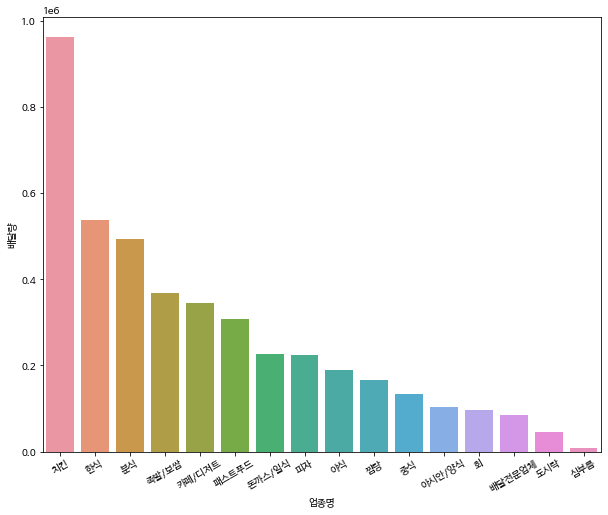

In [26]:
plt.figure(1, figsize = (10,8))
sns.countplot(x = 'DLVR_STORE_INDUTY_NM', data = df_dlvr_call, order = df_dlvr_call['DLVR_STORE_INDUTY_NM'].value_counts().index[:])
plt.xlabel("업종명")
plt.ylabel("배달량")
plt.xticks(rotation = 30)

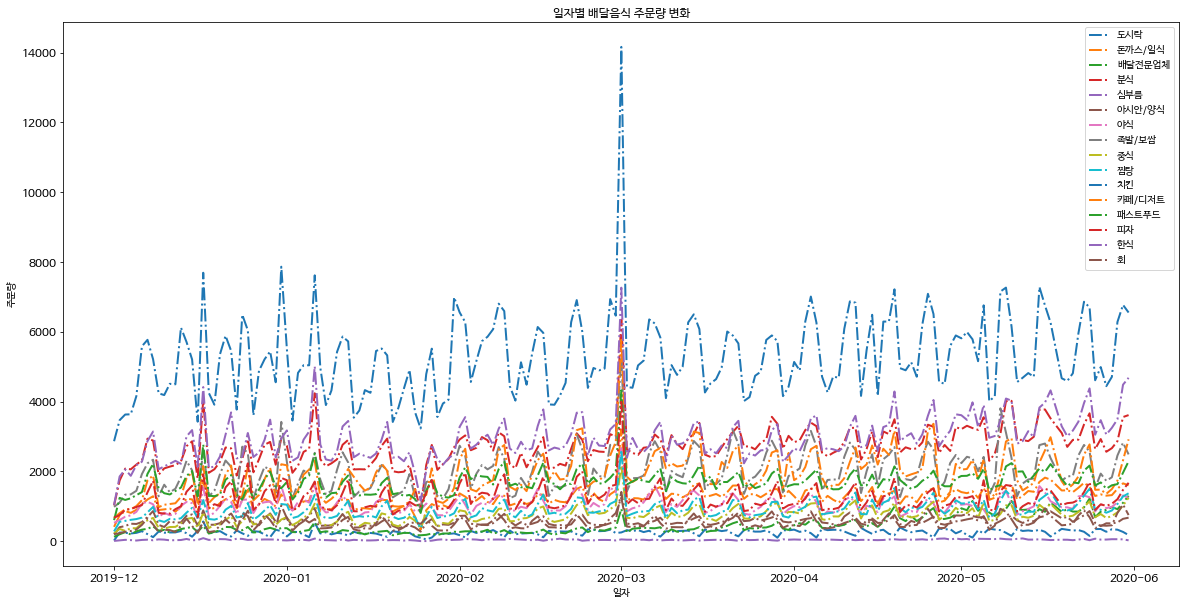

In [96]:
# str to timestamp 
#from datetime import datetime
#df_dlvr_call['PROCESS_DT'] = df_dlvr_call['PROCESS_DT'].map(lambda x : datetime.strptime(str(x),'%Y-%m-%d') )

# groupby 배달 업종
dlvr_store_groupby = df_dlvr_call.groupby(by = ['DLVR_STORE_INDUTY_NM'])

plt.figure(2, figsize = (20,10))
plt.title("일자별 배달음식 주문량 변화")

for key, item in dlvr_store_groupby:
    dlvr_key = dlvr_store_groupby.get_group(key)
    num_selled = dlvr_key["PROCESS_DT"].value_counts().sort_index(axis = 0)
    plt.plot(num_selled.keys(), num_selled.values, label = key, linestyle = '-.', linewidth = 2)
    
plt.ylabel("주문량")
plt.xlabel("일자")
plt.legend()
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# num_selled.keys()는 날짜 인덱스로 사용 예정
date_index = num_selled.keys()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


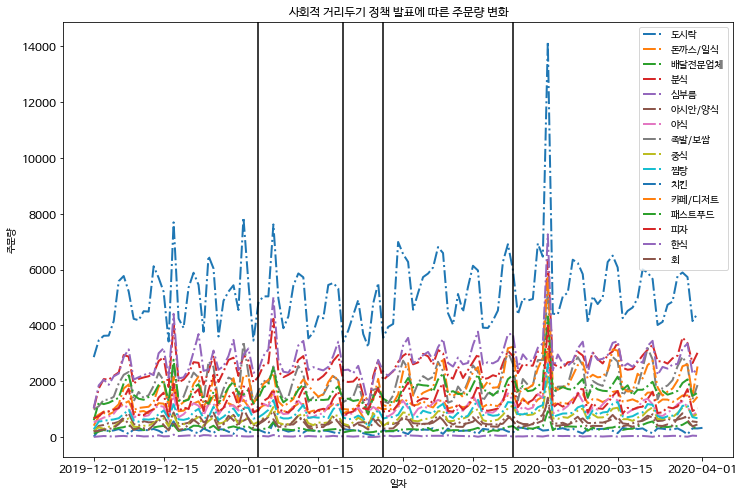

In [105]:
# 사회적 거리두기 정책에 따른 배달 변화 추이 분석
# 첫번째 : 각 음식별 배달량 추이 비교

# 사회적 거리두기 정책 시기를 위 그래프에 반영
alert_level = groupby_gov_policy.get_group('Infectious Disease Alert Level')

# start_date와 end_date는 하루 차이, start_date만을 출력할 예정
display(alert_level)

from datetime import datetime
alert_level['start_date'] = alert_level['start_date'].map(lambda x : datetime.strptime(str(x),'%Y-%m-%d') )


plt.figure(3, figsize = (12,8))
plt.title("사회적 거리두기 정책 발표에 따른 주문량 변화")

day_from = date_index[0]
day_to = date_index[np.argmax(date_index == '2020-04-01')]

idx_from = 0
idx_to = np.argmax(date_index == '2020-04-01')

for key, item in dlvr_store_groupby:
    dlvr_key = dlvr_store_groupby.get_group(key)
    num_selled = dlvr_key["PROCESS_DT"].value_counts().sort_index(axis = 0)[idx_from : idx_to]
    plt.plot(num_selled.keys(), num_selled.values, label = key, linestyle = '-.', linewidth = 2)
    
plt.ylabel("주문량")
plt.xlabel("일자")
plt.legend()
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.figure(3)
for alert_date in alert_level["start_date"]:
    plt.axvline(x = alert_date, c = 'k')

plt.show()

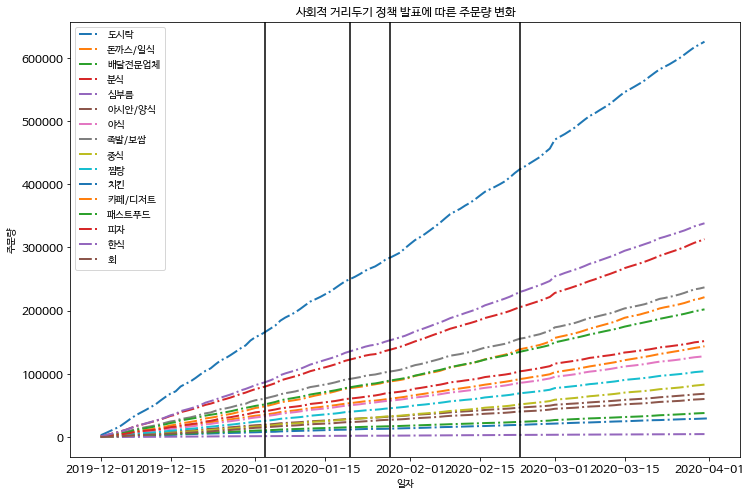

In [106]:
# 누적 그래프로도 비교

plt.figure(4, figsize = (12,8))
plt.title("사회적 거리두기 정책 발표에 따른 주문량 변화(누적)")

day_from = date_index[0]
day_to = date_index[np.argmax(date_index == '2020-04-01')]

idx_from = 0
idx_to = np.argmax(date_index == '2020-04-01')

for key, item in dlvr_store_groupby:
    dlvr_key = dlvr_store_groupby.get_group(key)
    num_selled = dlvr_key["PROCESS_DT"].value_counts().sort_index(axis = 0)[idx_from : idx_to]
    plt.plot(num_selled.keys(), num_selled.values.cumsum(), label = key, linestyle = '-.', linewidth = 2)
    
plt.ylabel("주문량")
plt.xlabel("일자")
plt.legend()
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.figure(4)
for alert_date in alert_level["start_date"]:
    plt.axvline(x = alert_date, c = 'k')

plt.show()

데이터에 반영된 광역시 : ['경기도' '서울특별시']
데이터에 반영된 시군구명 : ['강남구' '강동구' '강북구' '강서구' '고양시 덕양구' '고양시 일산동구' '고양시 일산서구' '관악구' '광명시' '광주시'
 '구로구' '구리시' '금천구' '김포시' '남양주시' '노원구' '도봉구' '동대문구' '동두천시' '동작구' '부천시'
 '서대문구' '서초구' '성남시 수정구' '성남시 중원구' '성북구' '송파구' '수원시 권선구' '수원시 장안구'
 '수원시 팔달구' '시흥시' '안산시 단원구' '안산시 상록구' '안양시 동안구' '안양시 만안구' '양주시' '양천구' '양평군'
 '여주시' '연천군' '영등포구' '오산시' '용인시 처인구' '은평구' '의정부시' '이천시' '중랑구' '파주시' '평택시'
 '포천시' '하남시' '화성시']


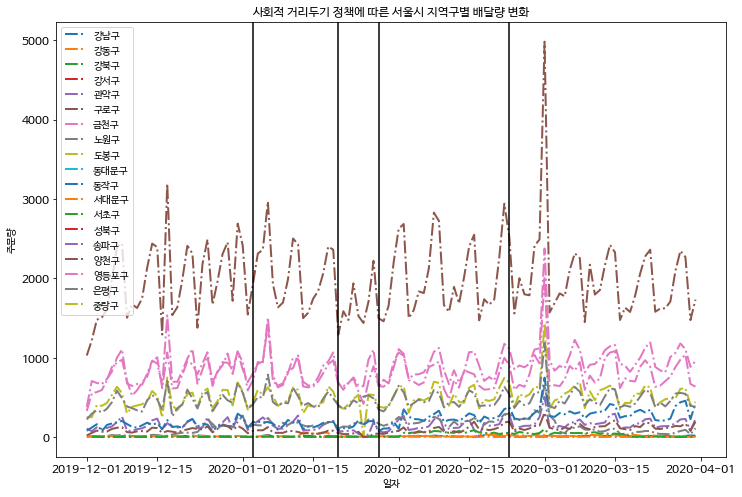

In [116]:
# 지역별 영향력을 파악해보자
# 배달 목적지 : '광역시도명'에 따른 배달 음식 수요 변화 관찰

print("데이터에 반영된 광역시 : {}".format(np.unique(df_dlvr_call['DLVR_STORE_BRTC_NM'].values)))
print("데이터에 반영된 시군구명 : {}".format(np.unique(df_dlvr_call['DLVR_STORE_SIGNGU_NM'].values)))

dlvr_store_groupby = df_dlvr_call.groupby(by = ['DLVR_STORE_INDUTY_NM'])

dlvr_store_seoul = df_dlvr_call[df_dlvr_call['DLVR_STORE_BRTC_NM'] == '서울특별시']
dlvr_store_other = df_dlvr_call[df_dlvr_call['DLVR_STORE_BRTC_NM'] == '경기도']

seoul_groupby = dlvr_store_seoul.groupby(by = ['DLVR_STORE_SIGNGU_NM'])
other_groupby = dlvr_store_other.groupby(by = ['DLVR_STORE_SIGNGU_NM'])

# seoul
plt.figure(5, figsize = (12,8))
plt.title("사회적 거리두기 정책에 따른 서울시 지역구별 배달량 변화")
for key, item in seoul_groupby:
    dlvr_key = seoul_groupby.get_group(key)
    num_selled = dlvr_key['PROCESS_DT'].value_counts().sort_index(axis = 0)
    date_index = num_selled.keys()

    # 구간 결정
    idx_from = 0
    idx_to = np.argmax(date_index == '2020-04-01')

    num_selled = num_selled[idx_from : idx_to]
    plt.plot(num_selled.keys(), num_selled.values, label = key, linestyle = '-.', linewidth = 2)

plt.ylabel("주문량")
plt.xlabel("일자")
plt.legend()
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.figure(5)
for alert_date in alert_level["start_date"]:
    plt.axvline(x = alert_date, c = 'k')

plt.show()

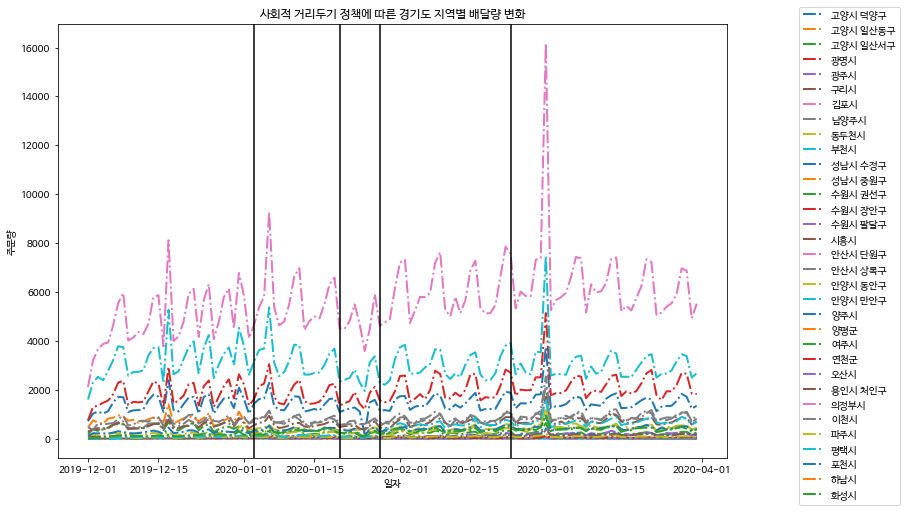

In [122]:
# 경기도
fig = plt.figure(6, figsize = (12,8))
ax = plt.subplot(111)

ax.set_title("사회적 거리두기 정책에 따른 경기도 지역별 배달량 변화")
for key, item in other_groupby:
    dlvr_key = other_groupby.get_group(key)
    num_selled = dlvr_key['PROCESS_DT'].value_counts().sort_index(axis = 0)
    date_index = num_selled.keys()

    # 구간 결정
    idx_from = 0
    idx_to = np.argmax(date_index == '2020-04-01')

    num_selled = num_selled[idx_from : idx_to]
    ax.plot(num_selled.keys(), num_selled.values, label = key, linestyle = '-.', linewidth = 2)

ax.set_ylabel("주문량")
ax.set_xlabel("일자")
ax.legend(bbox_to_anchor = (1.1, 1.05))

for alert_date in alert_level["start_date"]:
    ax.axvline(x = alert_date, c = 'k')

## 사회적 거리두기 정책에 따른 배달 업종별 추이
- 사회적 거리두기 시행 기간 동안 trend 영향 식별 x
- 주기성 요소(사회적 거리두기와 상관관계 없는 듯..)
- peak 값은 오히려 주말 여부에 따라 영향을 받는 듯 싶다..
- 대안책 : smoothing / envelop를 통해 추이를 비교해보자..

In [ ]:
# 기타 다른 정책에 대한 변화를 관찰

In [ ]:
# 확장 1: 그룹화된 정책 별로 배달음식 데이터에 미친 영향력을 분석

In [ ]:
# 확장 2: 정책(거리두기, 노래방 폐쇄 등) - > binary variable로 취급하여 예측 모델 구현
# 모델 : lgbm(gradient boosting + decision tree 기반 모델)